# Quality Control on in-silico spatial proteomics with Harpy

## Introduction

This noteboook outlines some quality controls steps for highly-multiplexed spatial proteomics data using the Harpy package. Most steps are similar to [this good resource on Imaging Mass Cytometry data analysis in R](https://bodenmillergroup.github.io/IMCDataAnalysis/image-and-cell-level-quality-control.html#image-and-cell-level-quality-control) from the Bodenmiller lab. Here, an artificial in-silico dataset is used to demonstrate the quality control steps.

The levels of quality control are:

- **Image level**: to give an overview of the quality of the images in the dataset.
- **Segmentation level**: to give an overview of the quality of the segmentation in the dataset.
- **Cell level**: to give an overview of the quality of the calculated features per cell in the dataset.

We start by loading in an example dataset and visualising the data:


In [163]:
import harpy
import matplotlib.pyplot as plt
import spatialdata_plot  # noqa
import scanpy as sc
from harpy.datasets import multisample_blobs

plt.viridis()

sdata = multisample_blobs(n_samples=4)
sdata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_0_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_1_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_2_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_3_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SpatialData object
├── Images
│     ├── 'sample_0_image': DataArray[cyx] (11, 512, 512)
│     ├── 'sample_1_image': DataArray[cyx] (11, 512, 512)
│     ├── 'sample_2_image': DataArray[cyx] (11, 512, 512)
│     └── 'sample_3_image': DataArray[cyx] (11, 512, 512)
├── Labels
│     ├── 'sample_0_labels': DataArray[yx] (512, 512)
│     ├── 'sample_1_labels': DataArray[yx] (512, 512)
│     ├── 'sample_2_labels': DataArray[yx] (512, 512)
│     └── 'sample_3_labels': DataArray[yx] (512, 512)
├── Points
│     ├── 'sample_0_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     ├── 'sample_1_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     ├── 'sample_2_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     └── 'sample_3_points': DataFrame with shape: (<Delayed>, 2) (2D points)
└── Tables
      ├── 'sample_0_table': AnnData (20, 11)
      ├── 'sample_1_table': AnnData (20, 11)
      ├── 'sample_2_table': AnnData (20, 11)
      ├── 'sample_3_table': AnnData (20, 1

<Figure size 640x480 with 0 Axes>

In [164]:
table = sdata["table"]

In [165]:
table.to_df()

,nucleus,lineage_0,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9
cells,,,,,,,,,,,
1,130579.074583,73143.384718,90176.329291,78887.342227,83547.398858,0.000000,85104.954042,89203.618952,71052.452962,166453.784109,79783.723973
2,97747.257070,44127.352051,54403.315415,47592.677537,50404.086393,0.000000,51343.758329,103611.315408,42865.894408,48557.293269,48133.464008
3,129783.693347,72871.920340,89159.713324,77997.994298,82605.515103,0.000000,132335.765591,88197.968976,70251.432797,79581.243727,78884.270554
4,126967.536598,69764.494608,86010.594981,159287.142678,79687.890840,0.000000,81180.370216,85082.819414,67770.154343,76768.146443,76776.118424
5,107214.353348,52460.254002,64676.705321,56579.963133,124573.992918,0.000000,61039.388909,63979.053282,50960.585762,57726.734557,57222.870407
...,...,...,...,...,...,...,...,...,...,...,...
16,161696.495625,84635.637309,175638.724282,105850.500384,102504.128585,88371.831230,106509.552476,97690.881838,97966.012854,96128.415489,0.000000
17,163295.271990,86338.942986,93873.258186,107784.066049,104567.040494,90150.328405,108653.074179,188483.571632,99937.594462,98063.015157,0.000000
18,153201.459416,75869.389265,82490.085245,94714.053483,91887.127930,80816.560758,95477.684746,87572.419579,175560.397181,86171.787748,0.000000


In [166]:
table.var

,cycle
nucleus,0
lineage_0,0
lineage_1,1
lineage_2,1
lineage_3,2
lineage_4,2
lineage_5,3
lineage_6,3
lineage_7,4
lineage_8,4


In [167]:
table.obs

,instance_id,region,fov_labels,cell_ID,phenotype,area,eccentricity,major_axis_length,minor_axis_length,perimeter,centroid-0,centroid-1,convex_area,equivalent_diameter,_major_minor_axis_ratio,_perim_square_over_area,_major_axis_equiv_diam_ratio,_convex_hull_resid,_centroid_dif
cells,,,,,,,,,,,,,,,,,,,
1,1,by,sample_0_labels,1,8,2393.0,0.000000,55.199096,55.199096,180.852814,482.000000,410.000000,2433.0,55.198390,1.000000,13.668090,1.000013,0.016441,0.000000
2,2,by,sample_0_labels,2,6,1489.0,0.840912,60.858245,32.934784,160.083261,161.000000,12.721961,1519.0,43.541402,1.847841,17.210645,1.397710,0.019750,0.003520
3,3,by,sample_0_labels,3,5,2332.0,0.296286,55.821777,53.315330,179.338095,369.522298,388.423671,2375.0,54.490317,1.047012,13.791661,1.024435,0.018105,0.001060
4,4,by,sample_0_labels,4,2,2352.0,0.249266,55.649195,53.892628,180.852814,64.180697,106.579082,2397.0,54.723481,1.032594,13.906352,1.016916,0.018773,0.001168
5,5,by,sample_0_labels,5,3,1706.0,0.765745,59.549068,38.298639,166.083261,216.000000,495.966002,1734.0,46.606294,1.554861,16.168611,1.277704,0.016148,0.002416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,16,by,sample_3_labels,16,1,2856.0,0.198505,60.937241,59.724580,198.409163,328.041317,117.297969,2911.0,60.302339,1.020304,13.783682,1.010529,0.018894,0.001298
17,17,by,sample_3_labels,17,6,2885.0,0.000000,60.607577,60.607577,197.823376,245.000000,470.000000,2933.0,60.607723,1.000000,13.564675,0.999998,0.016365,0.000000
18,18,by,sample_3_labels,18,7,2616.0,0.508391,62.616366,53.920614,194.793939,110.995413,406.372706,2680.0,57.713037,1.161270,14.504847,1.084961,0.023881,0.003410


In [168]:
selected_markers = table.var_names[:3].tolist()
selected_markers

['nucleus', 'lineage_0', 'lineage_1']

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_2_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_3_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData obje

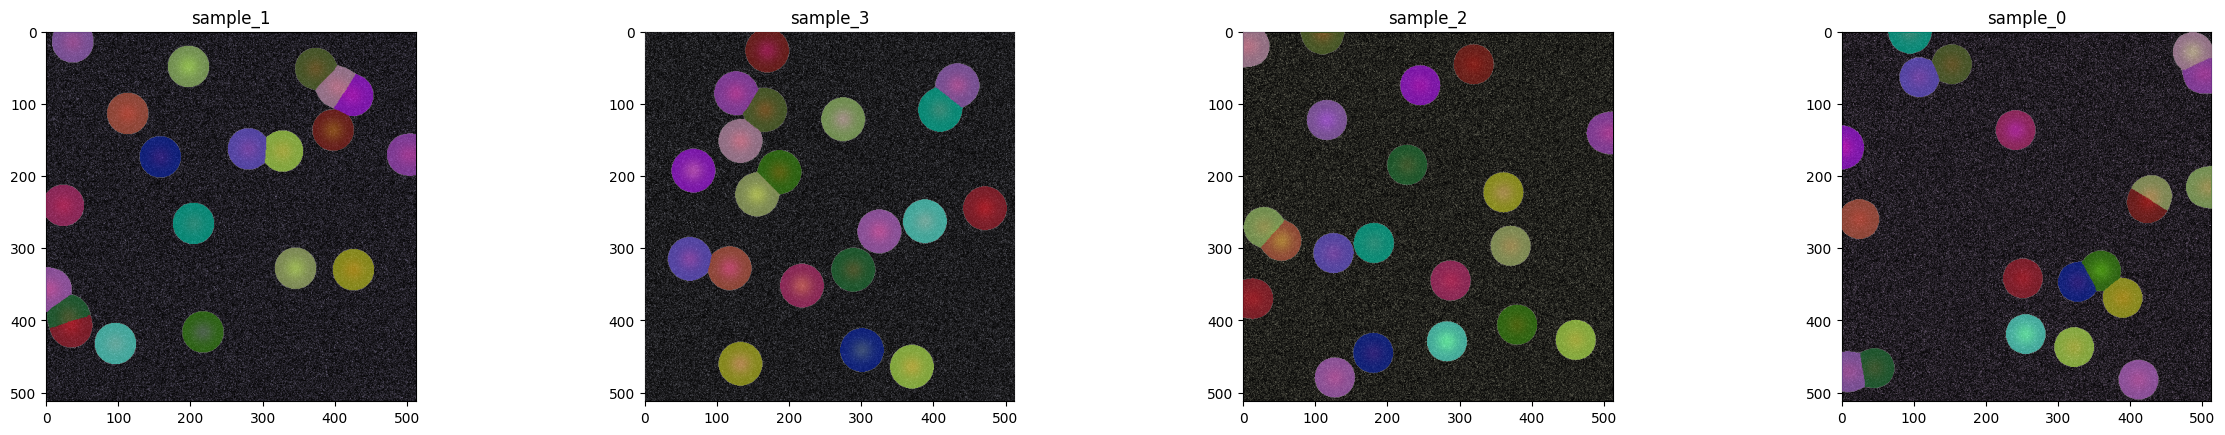

In [169]:
sdata.pl.render_images(channel=selected_markers).pl.render_labels().pl.show()

## Image level quality control


In [170]:
table.var["cycle"]

nucleus      0
lineage_0    0
lineage_1    1
lineage_2    1
lineage_3    2
lineage_4    2
lineage_5    3
lineage_6    3
lineage_7    4
lineage_8    4
lineage_9    5
Name: cycle, dtype: int64

In [171]:
df = harpy.pl.calculate_snr_ratio(sdata, cycles="cycle")
df

2024-09-27 15:30:05.353 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  signal = img[mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,image,cycle,channel,snr,signal
0,sample_0_image,0,nucleus,3.287837,73.395618
1,sample_0_image,0,lineage_0,3.350054,60.223873
2,sample_0_image,1,lineage_1,3.341242,71.868568
3,sample_0_image,1,lineage_2,3.339835,62.863215
4,sample_0_image,2,lineage_3,3.341236,66.354626
5,sample_0_image,2,lineage_4,NaN,NaN
6,sample_0_image,3,lineage_5,3.328766,68.452983
7,sample_0_image,3,lineage_6,3.333190,71.719604
8,sample_0_image,4,lineage_7,3.341090,56.638927
9,sample_0_image,4,lineage_8,3.346352,65.247809


In [172]:
df = df.groupby(["image", "channel"]).mean(numeric_only=True)

2024-09-27 15:30:07.347 | DEBUG    | sparrow.plot._qc_image:snr_ratio:64 - Plotting SNR ratio
2024-09-27 15:30:07.358 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  signal = img[mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2024-09-27 15:30:09.421 | DEBUG    | sparrow.plot._qc_image:snr_ratio:83 -              cycle       snr     signal
channel                                
lineage_0  #46327e  3.351258  61.258682
lineage_1  #365c8d  3.348022  66.036727
lineage_2  #365c8d  3.348832  65.884790
lineage_3  #277f8e  3.343608  63.511785
lineage_4  #277f8e  3.343991  65.138913
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/textalloc/__init__.py:502

<Axes: xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>

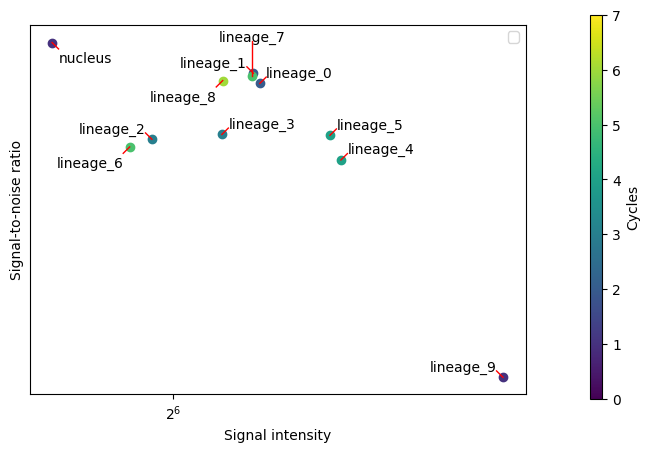

In [173]:
harpy.pl.snr_ratio(sdata, color="cycle")

2024-09-27 15:30:09.764 | DEBUG    | sparrow.plot._qc_image:group_snr_ratio:124 - Plotting SNR ratio
2024-09-27 15:30:09.766 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  signal = img[mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2024-09-27 15:30:12.013 | DEBUG    | sparrow.plot._qc_image:group_snr_ratio:147 - sample_0_image
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/textalloc/__init__.py:502: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ax.transDat

array([[<Axes: title={'center': 'sample_0_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>,
        <Axes: title={'center': 'sample_1_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>],
       [<Axes: title={'center': 'sample_2_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>,
        <Axes: title={'center': 'sample_3_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>]],
      dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


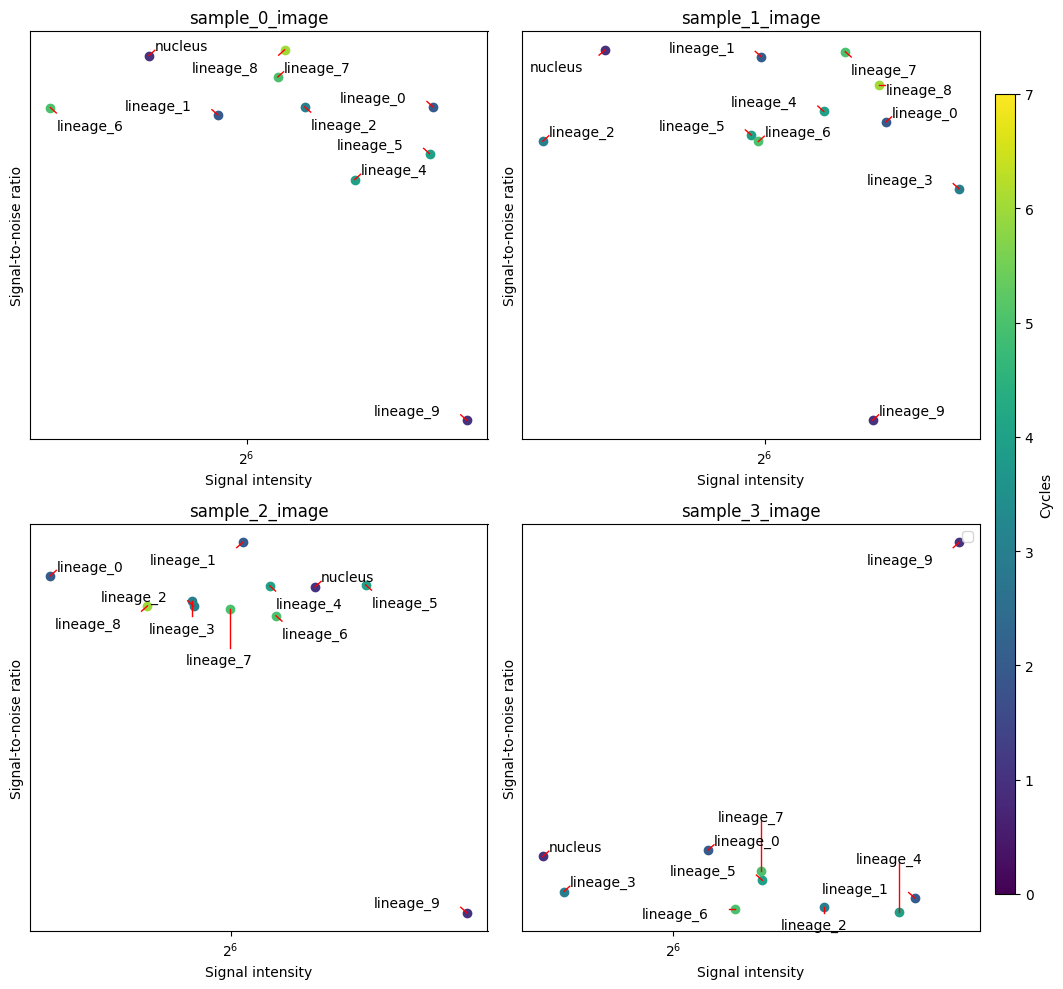

In [174]:
harpy.pl.group_snr_ratio(sdata, groupby=["image", "channel"], color="cycle")

2024-09-27 15:30:12.883 | DEBUG    | sparrow.plot._qc_image:snr_ratio:64 - Plotting SNR ratio
2024-09-27 15:30:12.892 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  signal = img[mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2024-09-27 15:30:14.363 | DEBUG    | sparrow.plot._qc_image:snr_ratio:83 -                 snr     signal
channel                       
lineage_0  3.351258  61.258682
lineage_1  3.348022  66.036727
lineage_2  3.348832  65.884790
lineage_3  3.343608  63.511785
lineage_4  3.343991  65.138913
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/textalloc/__init__.py:502: FutureWarning: Series.__getitem__ treating keys as positions 

<Axes: xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>

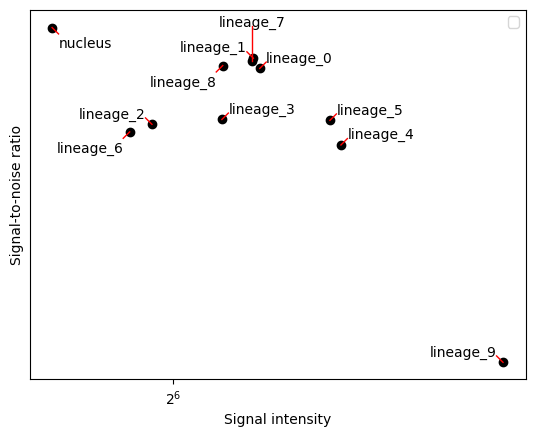

In [175]:
harpy.pl.snr_ratio(sdata, signal_threshold=2)

The plots above summarize all samples together. It would be interesting to look without cell segmentation bias across all channels and samples. There are multiple ways to aggregate the channel signal on an image level to a heatmap. One way is to create heatmaps using the SNR and signal values calculated above. This again depends on the unsupervised Otsu thresholding and is not a very good proxy of a good cell segmentation.

When showing the heatmap you could use the z_score or standard_scale options, but it's also interesting not to transform the data too much in order to still visualize the outliers.


2024-09-27 15:30:14.663 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  signal = img[mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


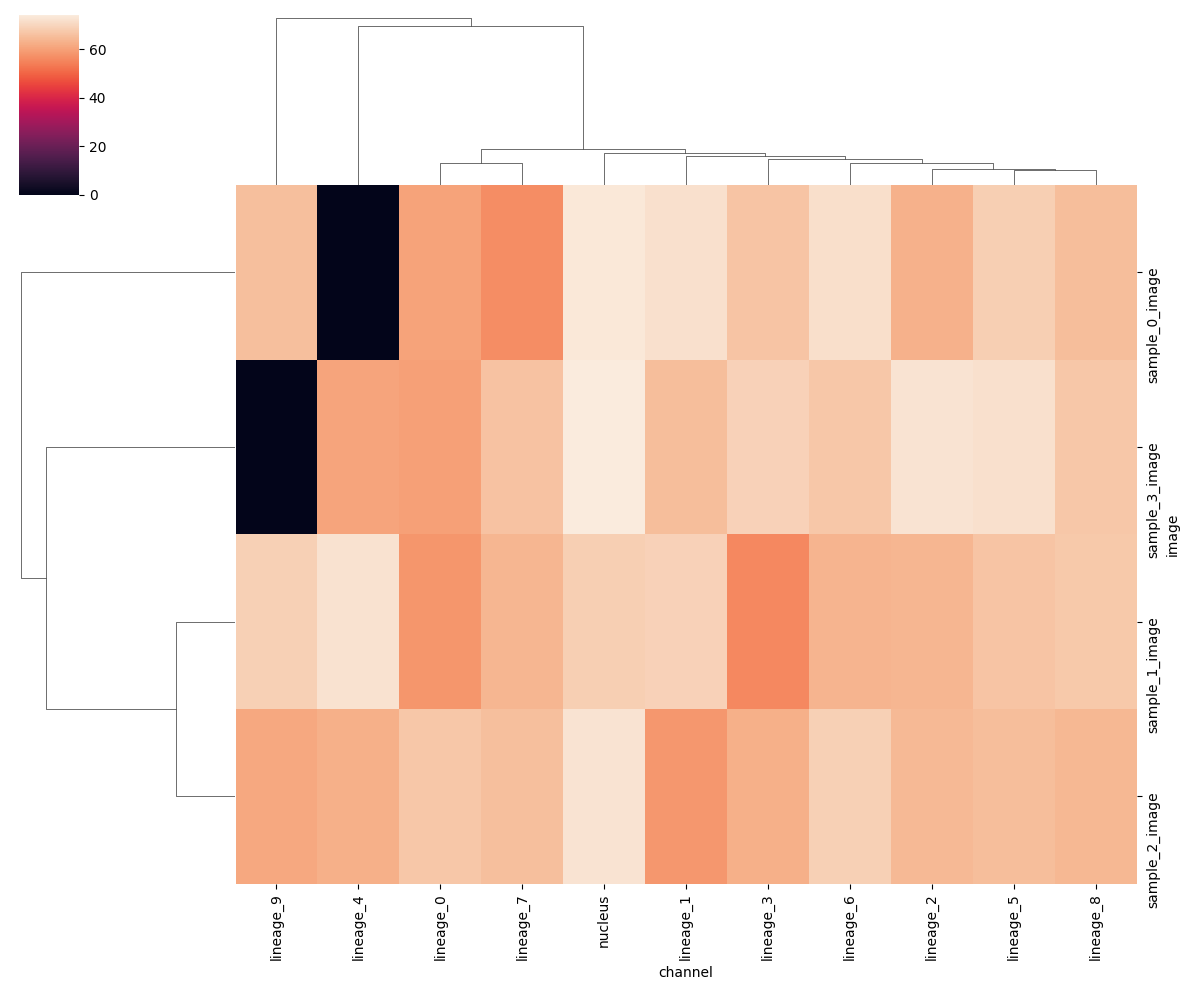

In [176]:
harpy.pl.signal_clustermap(sdata, signal_threshold=2, figsize=(12, 10))

2024-09-27 15:30:16.560 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  signal = img[mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


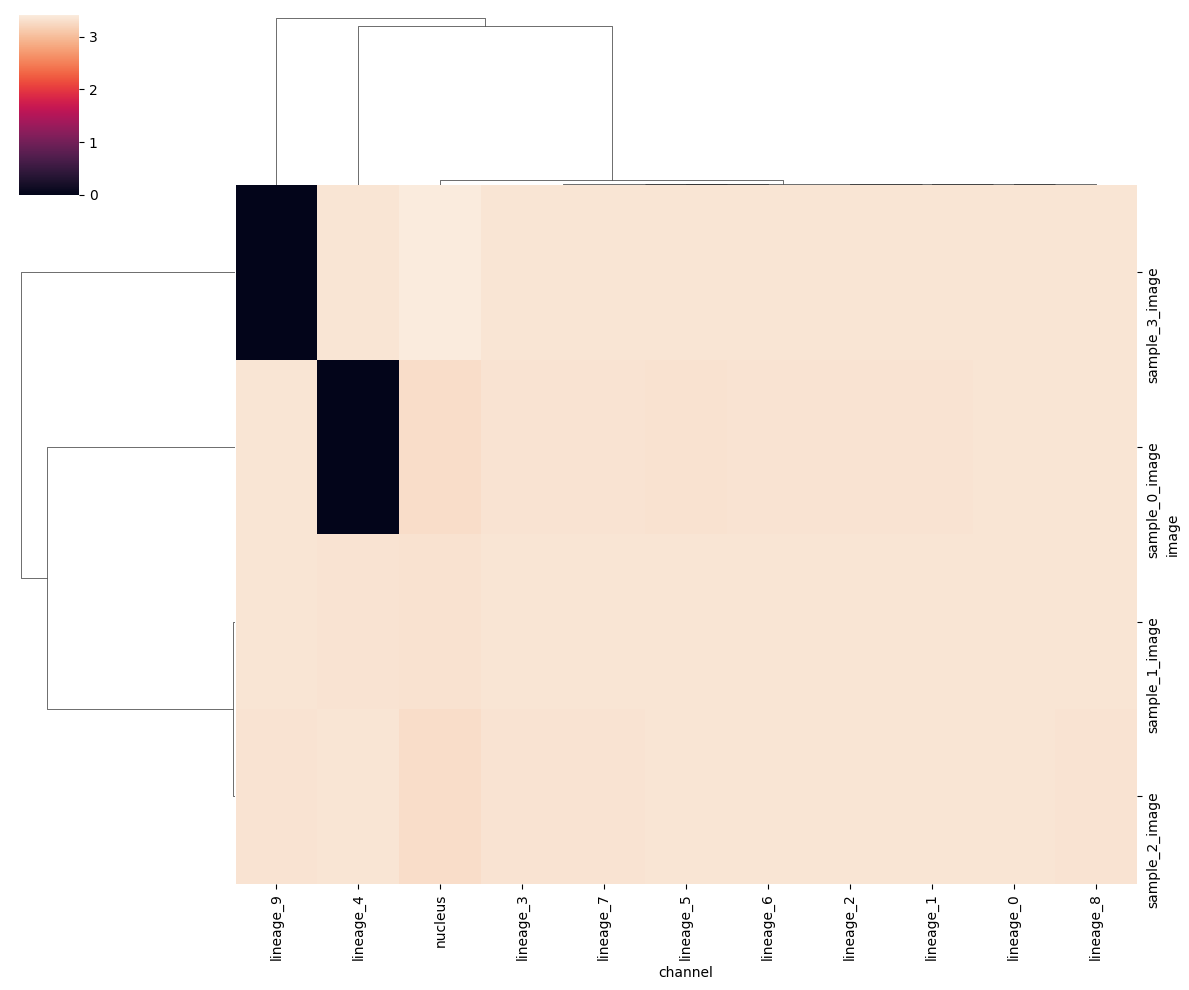

In [177]:
harpy.pl.snr_clustermap(sdata, signal_threshold=2, figsize=(12, 10))

Another way is to normalize the image with a quartile normalization. The min and max quartile can greatly influence how the ends of the intensity distributions. Here we clip the signal below and above the 5th and 95th percentile. We also apply an arcsinh transformation to each channel against extreme outliers to make the heatmap more interpretable.


In [178]:
df_norm = harpy.pl.calculate_mean_norm(sdata, overwrite=True, q_min=5, q_max=95, c_mask=selected_markers[0])
df_norm

2024-09-27 15:30:18,508 - harpy.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 15:30:19,154 - harpy.image._manager - INFO - Writing results to layer 'normalized_sample_0_image'
2024-09-27 15:30:19,202 - harpy.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 15:30:19,472 - harpy.image._manager - INFO - Writing results to layer 'normalized_sample_1_image'
2024-09-27 15:30:19,494 - harpy.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 15:30:19,720 - harpy.image._manager - INFO - Writing results to layer 'normalized_sample_2_image'
2024-09-27 15:30:19,741 - harpy.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 15:30:19,935 - harpy.image._manager - INFO - W

,lineage_0,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9
image_name,,,,,,,,,,
sample_0_image,0.331322,0.395357,0.350663,0.368848,0.000000,0.379894,0.395442,0.316976,0.359809,0.359169
sample_1_image,0.325366,0.387694,0.357238,0.318276,0.402458,0.372283,0.359916,0.361338,0.373854,0.383336
sample_2_image,0.376520,0.330558,0.358838,0.357882,0.356515,0.370799,0.385876,0.373850,0.362120,0.349794
sample_3_image,0.323949,0.350711,0.391374,0.378530,0.332451,0.391408,0.365116,0.363468,0.362484,0.000000


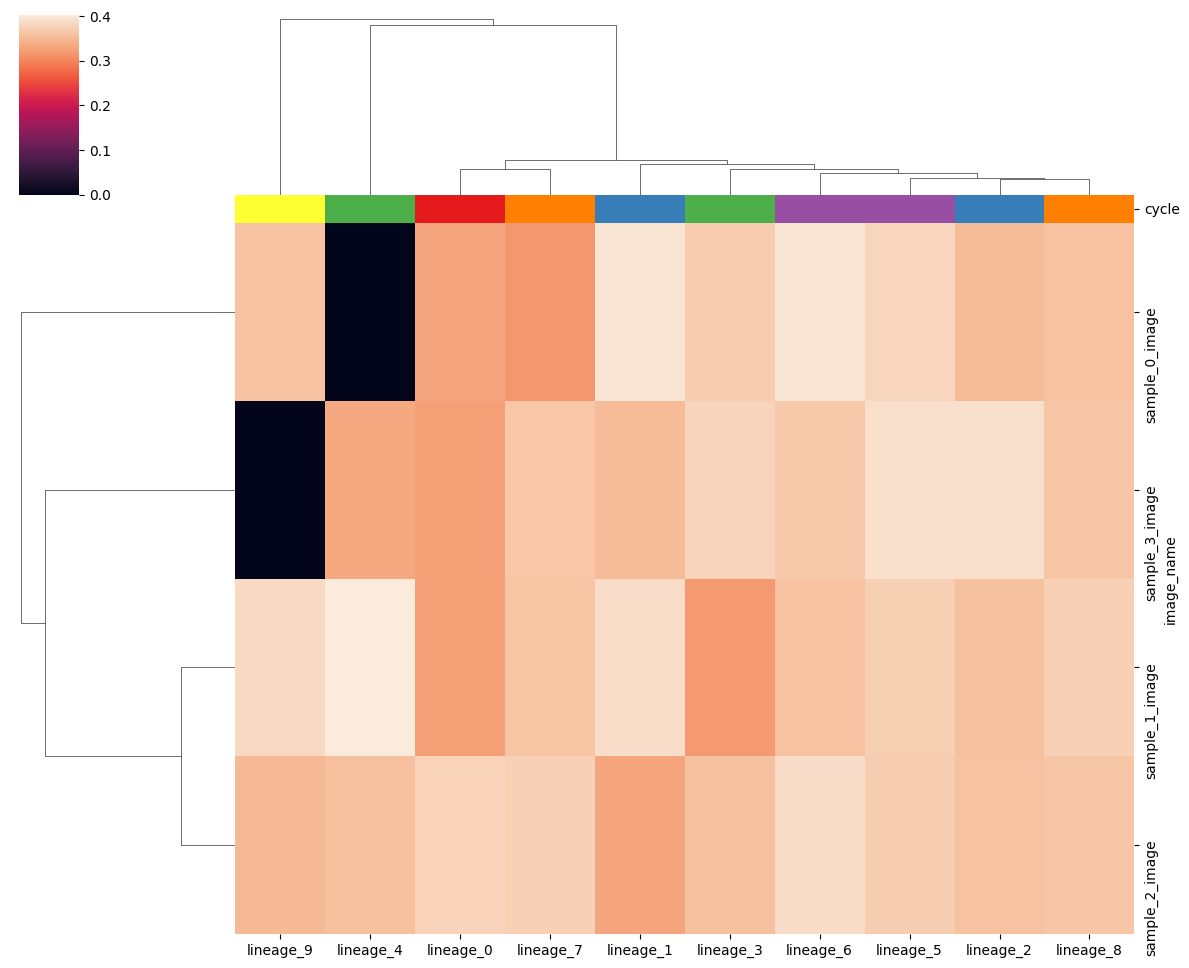

In [179]:
# harpy.pl.clustermap(df_norm, row_colors=harpy.pl.make_cols_colors(df_metadata), figsize=(12, 10))
harpy.pl.clustermap(df_norm, col_colors=harpy.pl.make_cols_colors(table.var), figsize=(12, 10))

## Segmentation level quality control


<Axes: xlabel='Percentile of covered area', ylabel='name'>

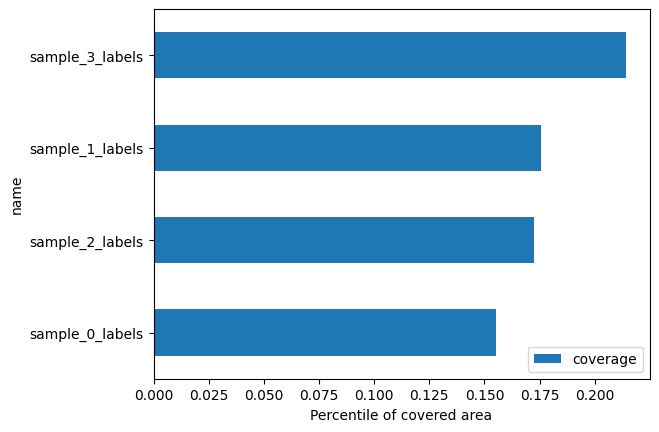

In [180]:
harpy.pl.segmentation_coverage(sdata)

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_2_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_3_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData obje

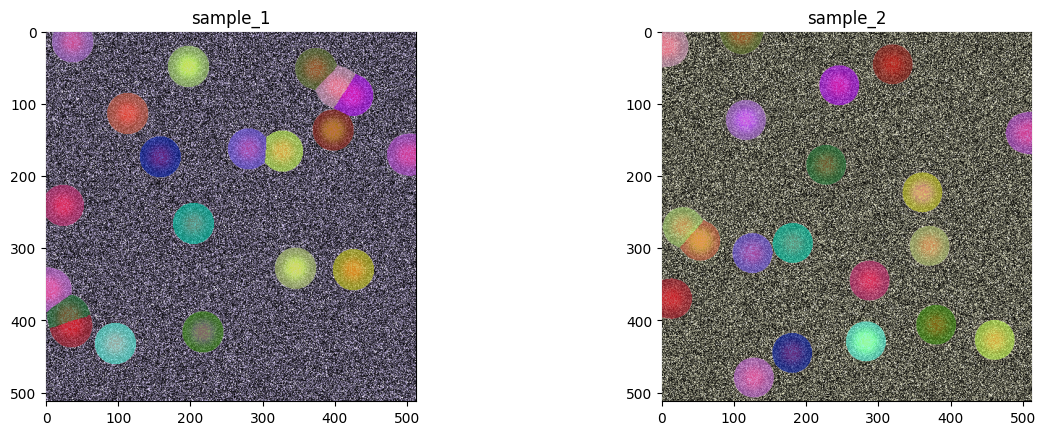

In [181]:
sdata.pl.render_images(channel=selected_markers).pl.render_labels().pl.show(coordinate_systems=["sample_1", "sample_2"])

/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_segmentation.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdata.table.obs[[area_key, sample_key]].plot.box(by=sample_key, rot=45, ax=ax)


<Axes: title={'center': 'area'}>

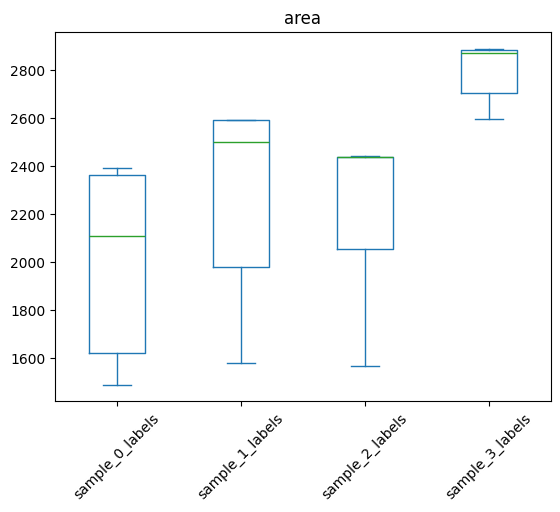

In [182]:
harpy.pl.segmentation_size_boxplot(sdata, sample_key="fov_labels")

In [183]:
table.obs["area"].describe()

count      80.000000
mean     2349.425000
std       414.222095
min      1489.000000
25%      2069.000000
50%      2437.000000
75%      2593.500000
max      2890.000000
Name: area, dtype: float64

In [197]:
harpy.pl.calculate_segments_per_area(sdata, sample_key="fov_labels")

/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_segmentation.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = table.groupby(sample_key).agg({sample_key: "count"})
2024-09-27 15:35:29.916 | DEBUG    | sparrow.plot._qc_segmentation:calculate_segments_per_area:26 - {'sample_0_labels': 1000, 'sample_1_labels': 1000, 'sample_2_labels': 1000, 'sample_3_labels': 1000}


,fov_labels,cells_per_mm2
fov_labels,,
sample_0_labels,20,1000
sample_1_labels,20,1000
sample_2_labels,20,1000
sample_3_labels,20,1000


/Users/benjaminr/Documents/GitHub/harpy/src/harpy/plot/_qc_segmentation.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = table.groupby(sample_key).agg({sample_key: "count"})
2024-09-27 15:35:17.389 | DEBUG    | sparrow.plot._qc_segmentation:calculate_segments_per_area:26 - {'sample_0_labels': 1000, 'sample_1_labels': 1000, 'sample_2_labels': 1000, 'sample_3_labels': 1000}


<Axes: xlabel='fov_labels'>

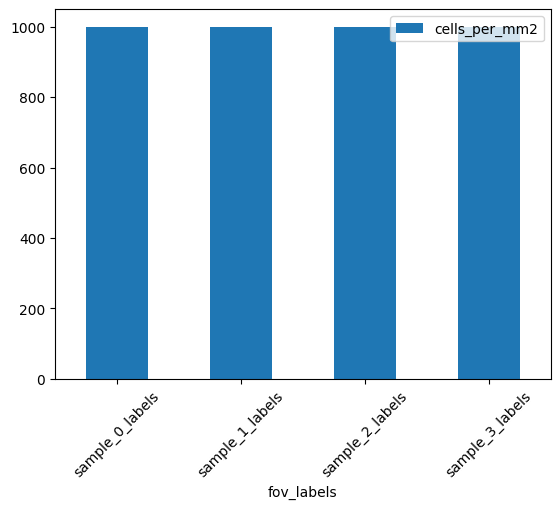

In [196]:
harpy.pl.segments_per_area(sdata, sample_key="fov_labels")

## Cell level quality control


In [186]:
import numpy as np

table.layers["arcsinh"] = np.arcsinh(table.to_df())

In [187]:
table

AnnData object with n_obs × n_vars = 80 × 11
    obs: 'instance_id', 'region', 'fov_labels', 'cell_ID', 'phenotype', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'centroid-0', 'centroid-1', 'convex_area', 'equivalent_diameter', '_major_minor_axis_ratio', '_perim_square_over_area', '_major_axis_equiv_diam_ratio', '_convex_hull_resid', '_centroid_dif'
    var: 'cycle'
    layers: 'arcsinh'

In [188]:
table.to_df()

,nucleus,lineage_0,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9
cells,,,,,,,,,,,
1,130579.074583,73143.384718,90176.329291,78887.342227,83547.398858,0.000000,85104.954042,89203.618952,71052.452962,166453.784109,79783.723973
2,97747.257070,44127.352051,54403.315415,47592.677537,50404.086393,0.000000,51343.758329,103611.315408,42865.894408,48557.293269,48133.464008
3,129783.693347,72871.920340,89159.713324,77997.994298,82605.515103,0.000000,132335.765591,88197.968976,70251.432797,79581.243727,78884.270554
4,126967.536598,69764.494608,86010.594981,159287.142678,79687.890840,0.000000,81180.370216,85082.819414,67770.154343,76768.146443,76776.118424
5,107214.353348,52460.254002,64676.705321,56579.963133,124573.992918,0.000000,61039.388909,63979.053282,50960.585762,57726.734557,57222.870407
...,...,...,...,...,...,...,...,...,...,...,...
16,161696.495625,84635.637309,175638.724282,105850.500384,102504.128585,88371.831230,106509.552476,97690.881838,97966.012854,96128.415489,0.000000
17,163295.271990,86338.942986,93873.258186,107784.066049,104567.040494,90150.328405,108653.074179,188483.571632,99937.594462,98063.015157,0.000000
18,153201.459416,75869.389265,82490.085245,94714.053483,91887.127930,80816.560758,95477.684746,87572.419579,175560.397181,86171.787748,0.000000


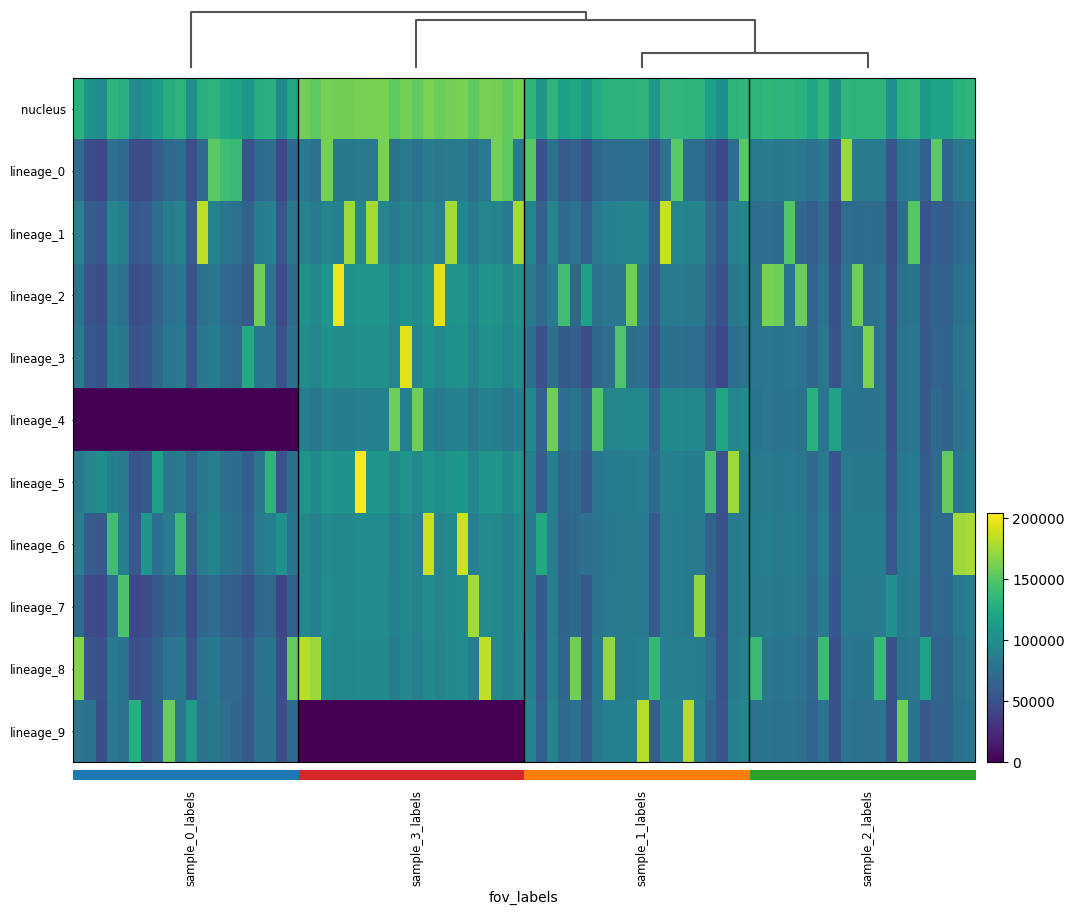

In [189]:
sc.tl.dendrogram(table, groupby="fov_labels")
sc.pl.heatmap(
    table,
    groupby="fov_labels",
    # var_names=used_var_names,
    var_names=table.var_names,
    swap_axes=True,
    dendrogram=True,
    figsize=(12, 10),
)

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

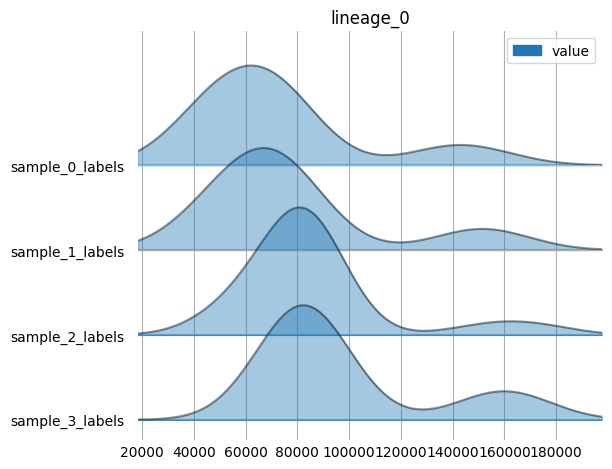

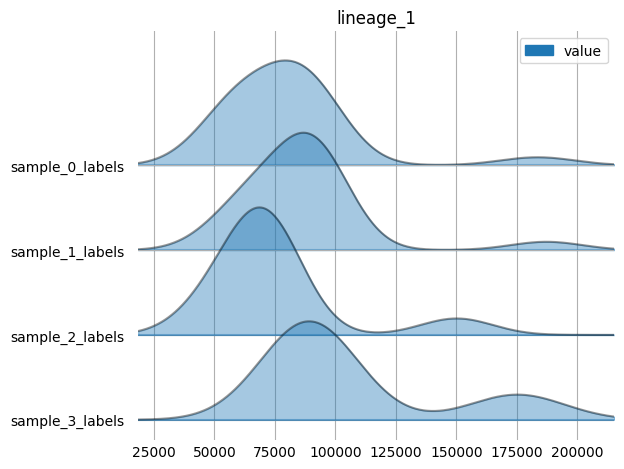

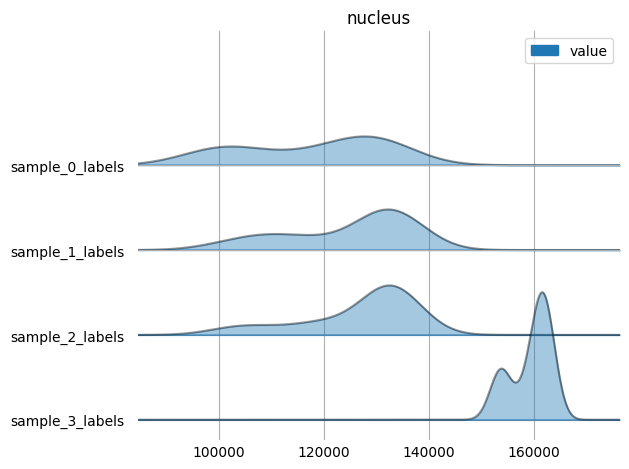

In [191]:
harpy.pl.ridgeplot_channel_sample(table, y="fov_labels", value_vars=selected_markers)

In [192]:
sc.pp.neighbors(table, n_neighbors=10, random_state=42)

In [193]:
sc.tl.umap(table, random_state=42)

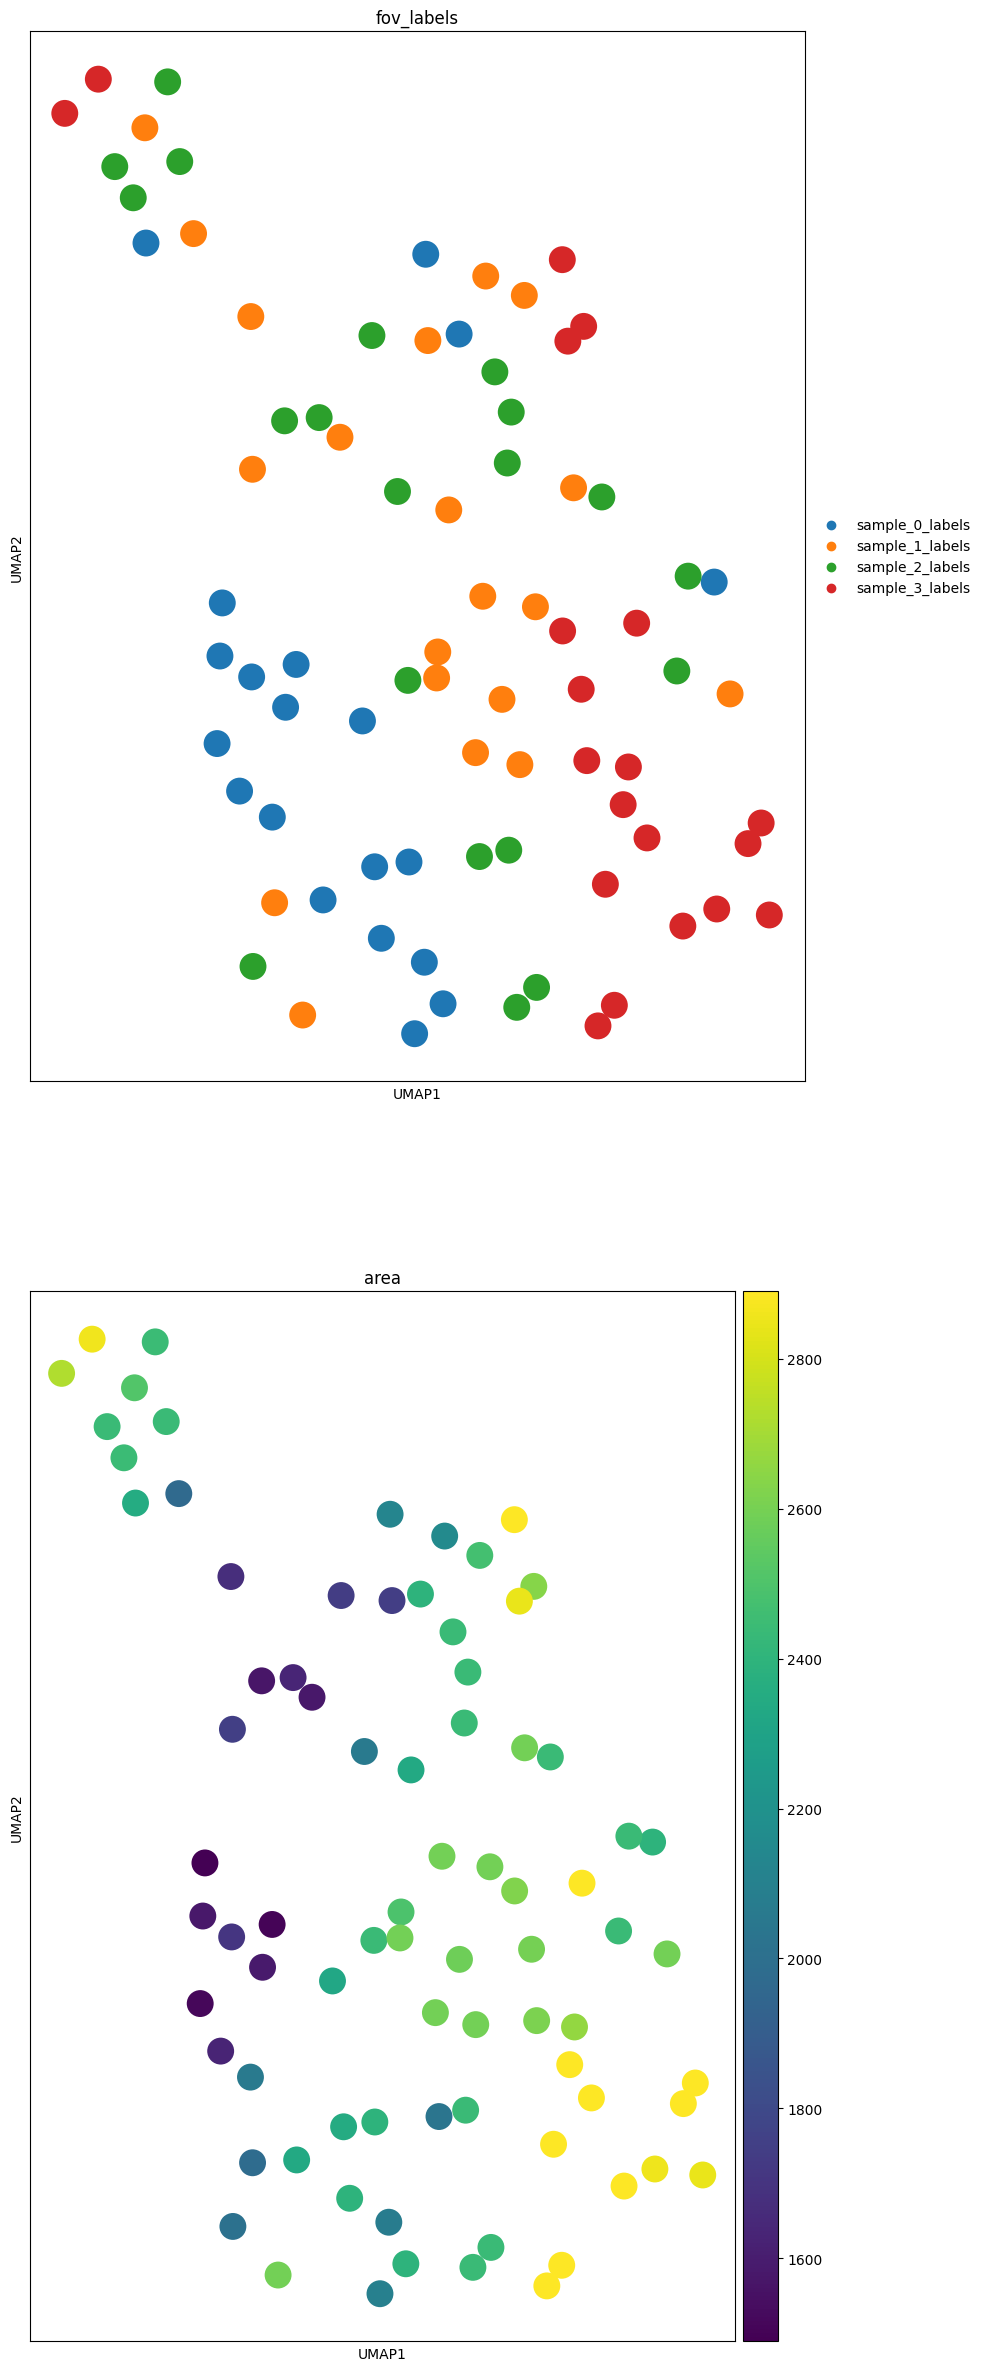

In [194]:
markers = ["fov_labels", "area"]
fig, axes = plt.subplots(len(markers), 1, figsize=(10, 30))
for c, axs in zip(markers, axes, strict=False):
    sc.pl.umap(table, color=c, ax=axs, show=False)

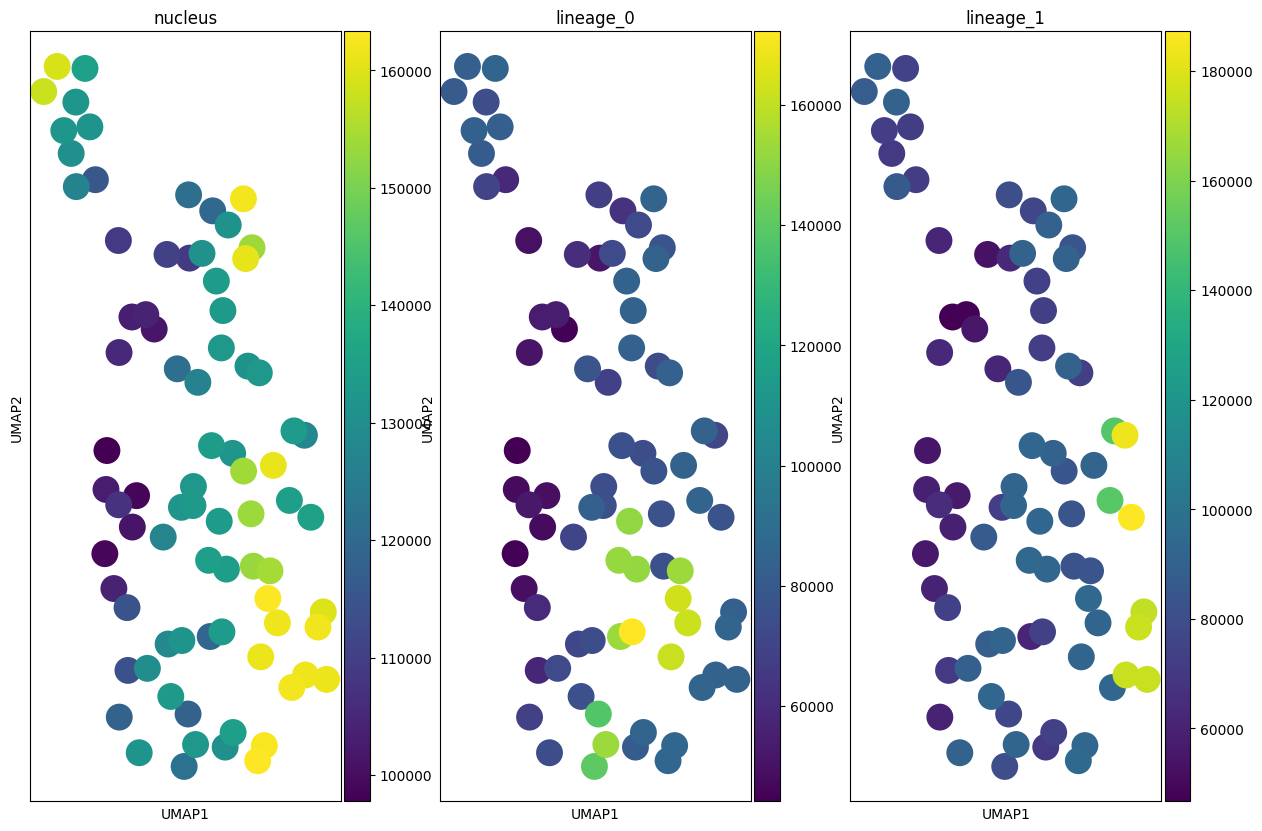

In [195]:
markers = selected_markers
fig, axes = plt.subplots(1, len(markers), figsize=(5 * len(markers), 10))
for c, axs in zip(markers, axes, strict=False):
    sc.pl.umap(table, color=c, ax=axs, show=False)